In [8]:
from google.colab import drive
drive.mount("/content/drive")
import nltk
nltk.download('punkt')
!pip install -U sentence-transformers
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import xgboost as xgb
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from nltk.util import ngrams
import re
from pathlib import Path
import string
from sklearn.model_selection import train_test_split
from functools import reduce
from math import log
import itertools
from tqdm import tqdm
import os
import json
from sklearn import svm
from nltk.tokenize.casual import TweetTokenizer
import pickle
from gensim.models.word2vec import Word2Vec
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import precision_recall_fscore_support
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
import gensim.downloader as api
import gensim
from sklearn.model_selection import KFold

t = TweetTokenizer()
dir="/content/drive/MyDrive/nlp_project/"
os.chdir(dir)
df=pd.read_csv("train.csv")
output=list(df["is_duplicate"])
output_np=np.array(output)

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 3.1 MB 11.6 MB/s 
     |████████████████████████████████| 3.3 MB 23.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.2 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 895 kB 60.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=94fd9d866d9de3990ac41a56c5e9d8b4fb2cc37a7f7152e020f6c94a5fec3fbb
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled 

In [9]:
log_accuracy=[]
log_f1=[]
xg_accuracy=[]
xg_f1=[]

In [10]:
output_encode=to_categorical(output_np)
output_encode=np.array(output_encode)

In [11]:
open_file = open("embeddings_para_1", "rb")
embeddings1= pickle.load(open_file)
open_file.close()
open_file = open("embeddings_para_2", "rb")
embeddings2 = pickle.load(open_file)
open_file.close()

In [12]:
np.unique(output_encode)

array([0., 1.], dtype=float32)

In [13]:
embeddings1=np.array(embeddings1)
embeddings2=np.array(embeddings2)
cosines=[]
for i in range(len(embeddings1)):
    val=cosine_similarity(np.vstack((embeddings1[i],embeddings2[i])))[0][1]
    cosines.append(val)
cosines=np.array(cosines)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cosines, output_np, test_size=0.25, random_state=42)


In [15]:
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1), y_train)
y_pred = clf.predict(X_test.reshape(-1,1))
print("Logisitc Regression(cosine)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
log_accuracy.append(accuracy_score(y_test, y_pred)*100)
log_f1.append(f1_score(y_test, y_pred)*100)

Logisitc Regression(cosine)
Accuracy:  73.15678573901688
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     64078
           1       0.64      0.62      0.63     37009

    accuracy                           0.73    101087
   macro avg       0.71      0.71      0.71    101087
weighted avg       0.73      0.73      0.73    101087

F1 Score:
  62.66767558643461


In [16]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train.reshape(-1,1), y_train)
preds = xgb_cl.predict(X_test.reshape(-1,1))
print("XGBoost(cosine)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
xg_accuracy.append(accuracy_score(y_test, y_pred)*100)
xg_f1.append(f1_score(y_test, y_pred)*100)

XGBoost(cosine)
Accuracy:  73.15678573901688
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     64078
           1       0.64      0.62      0.63     37009

    accuracy                           0.73    101087
   macro avg       0.71      0.71      0.71    101087
weighted avg       0.73      0.73      0.73    101087

F1 Score:
  62.66767558643461


In [17]:
input=np.hstack((embeddings1,embeddings2))

In [18]:
open_file = open("embeddings_nouns_1", "rb")
embeddings1= pickle.load(open_file)
open_file.close()
open_file = open("embeddings_nouns_2", "rb")
embeddings2 = pickle.load(open_file)
open_file.close()

embeddings1=np.array(embeddings1)
embeddings2=np.array(embeddings2)
cosines=[]
for i in range(len(embeddings1)):
    val=cosine_similarity(np.vstack((embeddings1[i],embeddings2[i])))[0][1]
    cosines.append(val)
cosines=np.array(cosines)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cosines, output_np, test_size=0.25, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1), y_train)
y_pred = clf.predict(X_test.reshape(-1,1))
print("Logisitc Regression(cosine_nouns)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
log_accuracy.append(accuracy_score(y_test, y_pred)*100)
log_f1.append(f1_score(y_test, y_pred)*100)
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train.reshape(-1,1), y_train)
preds = xgb_cl.predict(X_test.reshape(-1,1))
print("XGBoost(cosine_nouns)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
xg_accuracy.append(accuracy_score(y_test, y_pred)*100)
xg_f1.append(f1_score(y_test, y_pred)*100)

Logisitc Regression(cosine_nouns)
Accuracy:  69.08504555481912
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     64078
           1       0.60      0.48      0.53     37009

    accuracy                           0.69    101087
   macro avg       0.66      0.65      0.65    101087
weighted avg       0.68      0.69      0.68    101087

F1 Score:
  53.02649972192578
XGBoost(cosine_nouns)
Accuracy:  69.08504555481912
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     64078
           1       0.60      0.48      0.53     37009

    accuracy                           0.69    101087
   macro avg       0.66      0.65      0.65    101087
weighted avg       0.68      0.69      0.68    101087

F1 Score:
  53.02649972192578


In [20]:
open_file = open("embeddings_entities_1", "rb")
embeddings1= pickle.load(open_file)
open_file.close()
open_file = open("embeddings_entities_2", "rb")
embeddings2 = pickle.load(open_file)
open_file.close()

embeddings1=np.array(embeddings1)
embeddings2=np.array(embeddings2)
cosines=[]
for i in range(len(embeddings1)):
    val=cosine_similarity(np.vstack((embeddings1[i],embeddings2[i])))[0][1]
    cosines.append(val)
cosines=np.array(cosines)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cosines, output_np, test_size=0.25, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1), y_train)
y_pred = clf.predict(X_test.reshape(-1,1))
print("Logisitc Regression(cosine_entities)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
log_accuracy.append(accuracy_score(y_test, y_pred)*100)
log_f1.append(f1_score(y_test, y_pred)*100)
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train.reshape(-1,1), y_train)
preds = xgb_cl.predict(X_test.reshape(-1,1))
print("XGBoost(cosine_entities)")
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print("Classification report:\n", classification_report(y_test, y_pred))
print("F1 Score:\n ",f1_score(y_test, y_pred)*100)
xg_accuracy.append(accuracy_score(y_test, y_pred)*100)
xg_f1.append(f1_score(y_test, y_pred)*100)

Logisitc Regression(cosine_entities)
Accuracy:  71.06353932750996
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     64078
           1       0.62      0.54      0.58     37009

    accuracy                           0.71    101087
   macro avg       0.69      0.68      0.68    101087
weighted avg       0.70      0.71      0.71    101087

F1 Score:
  57.83882731085775
XGBoost(cosine_entities)
Accuracy:  71.06353932750996
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     64078
           1       0.62      0.54      0.58     37009

    accuracy                           0.71    101087
   macro avg       0.69      0.68      0.68    101087
weighted avg       0.70      0.71      0.71    101087

F1 Score:
  57.83882731085775


In [27]:
d_accuracy={"Logistic Regression":log_accuracy,"XG Boost":xg_accuracy}
d_f1={"Logistic Regression":log_f1,"XG Boost":xg_f1}
df1=pd.DataFrame.from_dict(d_accuracy,orient='index',columns=["Full Text","NN","NN+JJ"])
df2=pd.DataFrame.from_dict(d_f1,orient='index',columns=["Full Text","NN","NN+JJ"])

In [28]:
print(df1)

                     Full Text         NN      NN+JJ
Logistic Regression  73.156786  69.085046  71.063539
XG Boost             73.156786  69.085046  71.063539


Accuracy


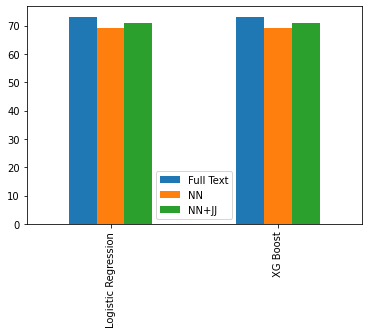

In [29]:
print("Accuracy")
df1.plot.bar()

In [30]:
print(df2)

                     Full Text       NN      NN+JJ
Logistic Regression  62.667676  53.0265  57.838827
XG Boost             62.667676  53.0265  57.838827


F1 Score


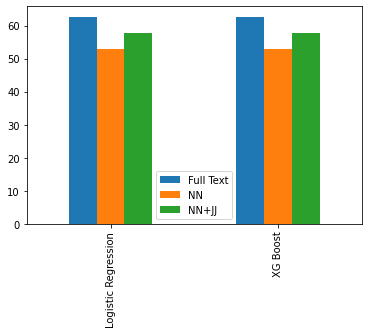

In [31]:
print("F1 Score")
df2.plot.bar()